In [1]:

from data_utils import get_class_names, calculate_ece
from data_utils import calculate_mce, calculate_cece, calculate_ace
from plot_utils import plot_loss, plot_histogram_balance_of_dataset, plot_confusion_matrix, \
    plot_metrics_table, plot_histogram_confidence
from model import Model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


train_val_split_ratio = 0.5
batch_size = 32
learning_rate = 1e-4
patience_early_stopping = 15
patience_reduce_learning_rate = 5
factor_reduce_learning_rate = 0.5
weight_decay = 1e-6
momentum = 0.9
epochs = 320
train_dir = "train_data_chest_xray_balanced"
test_dir = "data/chest_xray/test"

model = Model(learning_rate=learning_rate, batch_size=batch_size, patience_early_stopping=patience_early_stopping,
              patience_reduce_learning_rate=patience_reduce_learning_rate,
              factor_reduce_learning_rate=factor_reduce_learning_rate, train_dir=train_dir,
              weight_decay=weight_decay, momentum=momentum, test_dir=test_dir,
              train_val_split_ratio=train_val_split_ratio)


model.load_existing_model("baseline320.pth")

true_labels_val, predicted_labels_val, confidence_all_classes_val, _ = model.evaluate(model.val_loader)

FileNotFoundError: [Errno 2] No such file or directory: 'train_data_chest_xray_balanced'

In [2]:
model.optimize_platt_scaling(true_labels_val, confidence_all_classes_val[:,1])
model.optimize_beta_calibration(true_labels_val, confidence_all_classes_val[:,1])
model.optimize_spline_calibration(true_labels_val, confidence_all_classes_val[:,1])
true_labels, predicted_labels_baseline, confidence_baseline, _ = model.evaluate()

In [5]:

#predicted_labels_platt_scaling, confidence_platt_scaling = model.evaluate_with_platt_scaling(confidence_baseline[:, 1])
predicted_labels_beta_calibration, confidence_beta_calibration = model.evaluate_with_beta_calibration(
    confidence_baseline)

predicted_labels_spline_calibration, confidence_spline_calibration = model.evaluate_with_spline_calibration(
    confidence_baseline)



AttributeError: 'BetaCalibration' object has no attribute 'predict'

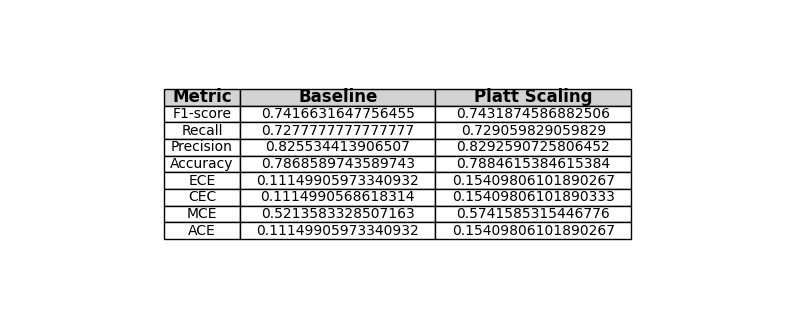

In [32]:

results = {
    "Metric": ["F1-score", "Recall", "Precision", "Accuracy", "ECE", "CEC", "MCE", "ACE"],
    "Baseline": [
        f1_score(true_labels, predicted_labels_baseline, average='macro', zero_division=0),
        recall_score(true_labels, predicted_labels_baseline, average='macro', zero_division=0),
        precision_score(true_labels, predicted_labels_baseline, average='macro', zero_division=0),
        accuracy_score(true_labels, predicted_labels_baseline),
        calculate_ece(true_labels, confidence_baseline[:, 1]),
        calculate_cece(true_labels, confidence_baseline),
        calculate_mce(true_labels, confidence_baseline[:, 1]),
        calculate_ace(true_labels, confidence_baseline[:, 1])
    ],
    "Platt Scaling": [
        f1_score(true_labels, predicted_labels_platt_scaling, average='macro', zero_division=0),
        recall_score(true_labels, predicted_labels_platt_scaling, average='macro', zero_division=0),
        precision_score(true_labels, predicted_labels_platt_scaling, average='macro', zero_division=0),
        accuracy_score(true_labels, predicted_labels_platt_scaling),
        calculate_ece(true_labels, confidence_platt_scaling[:, 1]),
        calculate_cece(true_labels, confidence_platt_scaling),
        calculate_mce(true_labels, confidence_platt_scaling[:, 1]),
        calculate_ace(true_labels, confidence_platt_scaling[:, 1])
    ]}
plot_metrics_table(results)